BÀI 1: Thực hiện lại 7 câu hỏi trong bài hướng dẫn.

In [1]:
# Đọc dữ liệu:

import pandas as pd

data = pd.read_csv('housing.csv')
# Mô tả sơ lược về dữ liệu: 
data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


CÂU 1: Dựa vào kết quả thu được, hãy cho biết khoảng min - max của biến mục tiêu (median_house_value) rong bộ dữ liệu. Có nhận xét gì về miền giá trị củat biến mục tiêu? (giá trị min-max, mean, median như thế nào?)

In [2]:

print('Min median_house_value: ', data['median_house_value'].min())
print('Max median_house_value: ', data['median_house_value'].max())
print('Mean median_house_value: ', data['median_house_value'].mean())
print('Median median_house_value: ', data['median_house_value'].median())

Min median_house_value:  14999.0
Max median_house_value:  500001.0
Mean median_house_value:  206855.81690891474
Median median_house_value:  179700.0


<Axes: xlabel='median_house_value', ylabel='Count'>

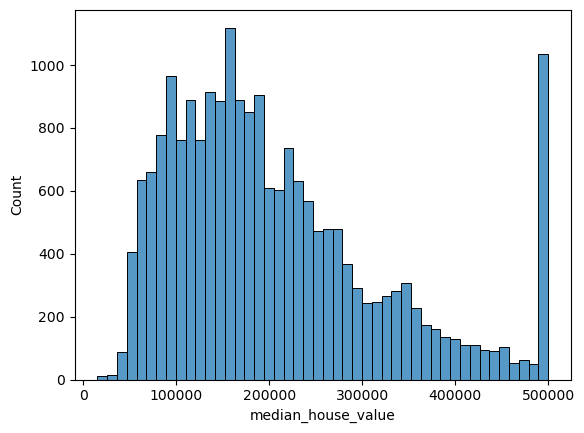

In [3]:
# Thể hiện phân bố của thuộc tính giá nhà:

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['median_house_value'])

CÂU 2: Hãy cho biết bộ dữ liệu có bao nhiêu dòng, và có tổng cộng bao nhiêu thuộc tính? Liệt kê ra các thuộc tính. Sử dụng: data.columns.

In [4]:
print('Rows of data: ', data.shape[0])
print('Columns of data: ', data.shape[1])
print('Attributes:', data.columns)

Rows of data:  20640
Columns of data:  10
Attributes: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


CÂU 3: Cho biết số lượng các giá trị NA trong thuộc tính. 

In [5]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

CÂU 4: Vẽ ma trận tương quan giữa các thuộc tính và thể hiện lên màn hình theo code gợi ý. Cho biết mức độ tương quan giữa các thuộc tính với nhau.
Dựa vào mức độ tương quan, ta chọn ra được thuộc tính thu nhập bình quân - median_income. Để thể hiện phân bố dữ liệu giữa thuộc tính media_income 
và thuộc tính median_house_values, ta dùng biểu đồ tán xạ (scatter plot) như sau:

<Axes: >

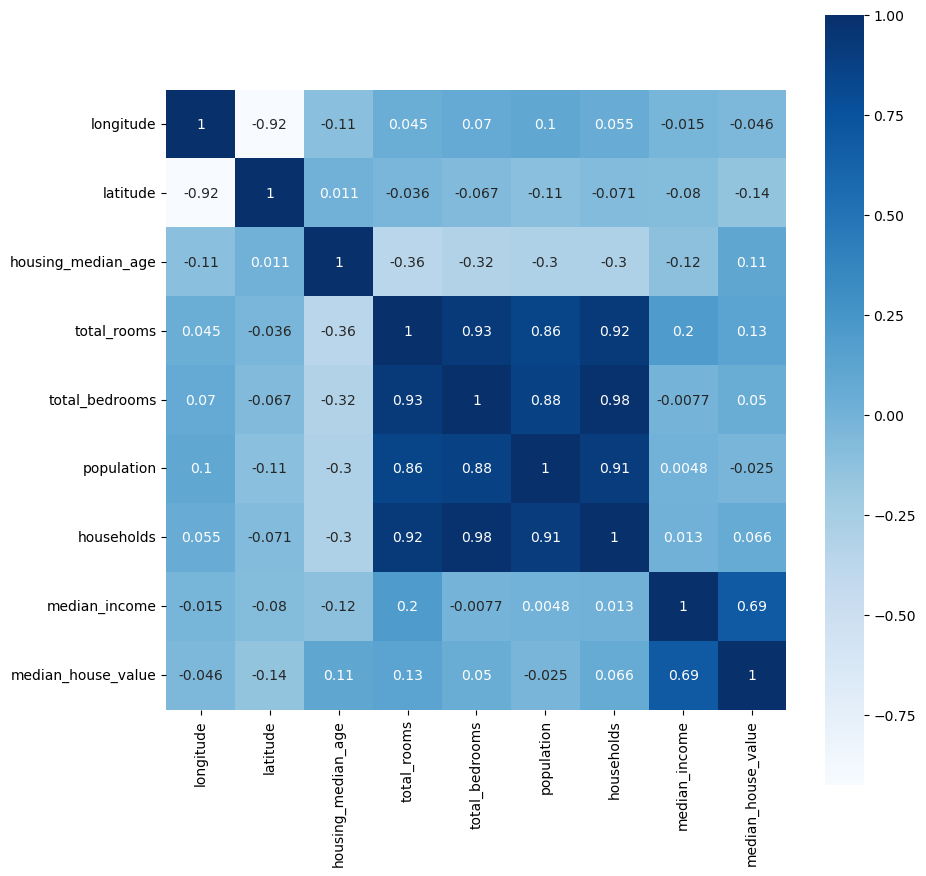

In [6]:
# Xét mối tương quan giữa các thuộc tính với nhau. Chọn ra thuộc tính có mối tương quan nhất với thuộc tính dự đoán (median_house_value)
# Mối tương quan (correlation) giữa các thuộc tính được thể hiện dưới dạng một ma trận, trong đó, các giá trị trong mỗi ô thể hiện mức
# độ tương quan giữa các cặp thuộc tính với nhau. Hai thuộc tính trùng nhau sẽ có độ tương quan là 1. Các độ đo dùng để tính độ 
# tương quan: pearson, kendall và spearman.

import matplotlib.pyplot as plt
import seaborn as sns

# Mã hóa thuộc tính ocean_proximity
data = data.select_dtypes(include=['float64', 'int64'])

# tinh su phu thuoc cua tung thuoc tinh
correlation = data.corr(method='pearson')

fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')


<Axes: xlabel='median_income', ylabel='median_house_value'>

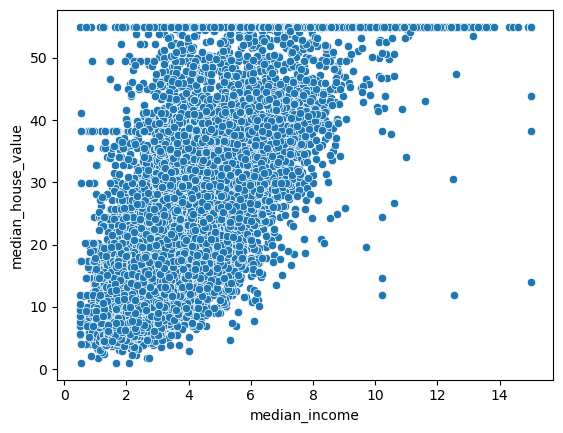

In [7]:
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split

# Dữ liệu phục vụ cho bài toán: 
X = data['median_income']
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(1, 55))

# Chuẩn hoá lại miền giá trị của biến mục tiêu y_train và y_test.
y_train_transformed = sc.fit_transform(y_train.values.reshape(-1,1)).reshape(-1)
y_test_transformed = sc.transform(y_test.values.reshape(-1,1)).reshape(-1)


data_train_visualize = pd.DataFrame({'median_income': X_train, 'median_house_value': y_train_transformed})

# Vẽ biểu đồ tán xạ dữ liệu huấn luyện
sns.scatterplot(data = data_train_visualize, x='median_income', y='median_house_value')


CÂU 5: Vẽ biểu đồ tán xạ (scatter plot) giữa thuộc tính median_income và thuộc tính median_house_value.

<Axes: xlabel='median_income', ylabel='median_house_value'>

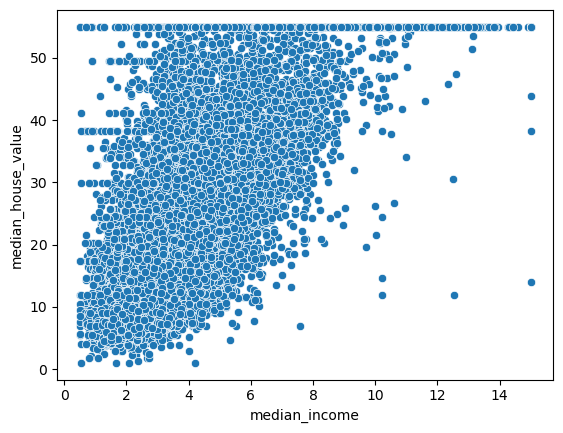

In [8]:
y = sc.fit_transform(y.values.reshape(-1,1)).reshape(-1)
data_visualize = pd.DataFrame({'median_income': X, 'median_house_value': y})

# Vẽ biểu đồ tán xạ dữ liệu huấn luyện
sns.scatterplot(data = data_visualize, x='median_income', y='median_house_value')

CÂU 6: Hãy phân chia dữ liệu huấn luyện (X,y) thành tập huấn luyện và tập kiểm thử theo tỉ lệ lần lượt là 8-2. Cho biết chiều (shape) của từng tập dữ liệu.

In [12]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)


Shape of X_train:  (16512,)
Shape of X_test:  (4128,)
Shape of y_train:  (16512,)
Shape of X_test:  (4128,)


Câu 7: Dự đoán kết quả cho tập kiểm tra dựa vào mô hình đã huấn luyện, kết quả lưu vào biến y_pred

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

# Huấn luyện mô hình hồi quy tuyến tính trên tập huấn luyện: 
model = LinearRegression()
model.fit(X_train, y_train_transformed)

# Predicting on test data
y_pred = model.predict(X_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test_transformed, y_pred, squared=True)
print("MSE:", mse)

MSE: 87.90581581394004


<Axes: xlabel='median_income', ylabel='median_house_value'>

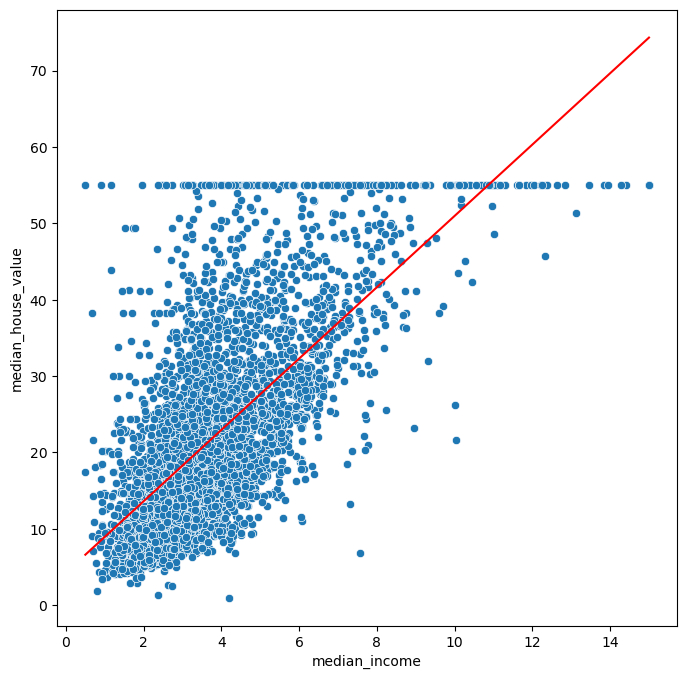

In [14]:
# Mô phỏng đường hồi quy trên dữ liệu dự đoán:
import seaborn as sns

test_true = pd.DataFrame({'median_income': X_test.reshape(-1), 'median_house_value': y_test_transformed})
test_pred = pd.DataFrame({'median_income': X_test.reshape(-1), 'median_house_value': y_pred})

fig= plt.figure(figsize=(8,8))

sns.lineplot(data=test_pred, x="median_income", y="median_house_value", color='red')
sns.scatterplot(data=test_true, x="median_income", y="median_house_value")


Câu 8: Thực hiện lại mô hình Hồi quy tuyến tính bằng phương pháp cross - valiation. Cho biết kết quả  cuối cùng theo độ đo MSE.

In [15]:
# Kết quả cuối cùng của mô hình được lấy trung bình từ các lần chia (split). 
# Mỗi split sẽ chia làm k fold khác nhau. Một cách tiếp cận với cross 
# validation trong sklearn là sử dụng ShuffleSplit() như sau: 

from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

y_transformed = y
kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

avg_mse = []
for train_index, test_index in kf.split(X, y_transformed):
    X1_train = X.values[train_index].reshape(-1,1)
    y1_train = y_transformed[train_index]

    X1_test = X.values[test_index].reshape(-1,1)
    y1_test = y_transformed[test_index]

    model1 = LinearRegression()
    model1.fit(X1_train, y1_train)

    y1_pred = model1.predict(X1_test)
    result = mean_squared_error(y1_test, y1_pred, squared=True)
    
    # Lưu lại kết quả từng fold vào avg_mse
    avg_mse.append(result)


In [16]:
import numpy as np
np.mean(np.array(avg_mse))

87.48644533666005

In [17]:
# Phương pháp cross - valiation. Cho biết kết quả  cuối cùng theo độ đo MSE.

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Instantiate the linear regression model
model1 = LinearRegression()

# Perform cross-validation
scores = cross_val_score(model1, sc.fit_transform(X.values.reshape(-1,1)), y_transformed, cv=5, scoring='neg_mean_squared_error')

# Take the absolute value of scores because cross_val_score returns negative mean squared error
avg_mse = -scores

# Print the average mean squared error
print("Average MSE:", avg_mse.mean())

Average MSE: 89.64593937614602


BÀI 2: Thực hiện dự đoán giá nhà dựa vào thuộc tính total_bedrooms (tổng số phòng ngủ trong ngôi nhà). 

In [18]:
X2 = data['total_bedrooms']
y2 = data['median_house_value']

Gợi ý: thuộc tính total_bedrooms có tồn tại giá trị Null, gây ảnh hưởng đến quá trình huấn luyện mô hình. Do đó, ta cần xử lý các giá trị thiếu này bằng phương pháp điền giá trị thiếu (filling missing value). Phương pháp sử dụng là điền giá trị dựa trên giá trị trung vị (median) của các giá trị trước đó.
Để thực hiện điền giá trị thiếu, ta sử dụng thư viện SimpleImputer trong sklearn.


In [19]:
# Xu ly cho thuoc tinh Null

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')

X2_processed = imp.fit_transform(X2.values.reshape(-1, 1))

y2_transformed = sc.fit_transform(y2.values.reshape(-1,1)).reshape(-1)

Hãy đánh giá độ chính xác của mô hình hồi quy tuyến tính khi dự đoán giá nhà dựa trên thuộc tính total_bedrooms, sử dụng cross_validation với 5 lần thực hiện. So sánh kết quả khi dự đoán bằng thuộc tính median_income với khi dự đoán bằng thuộc tính total_bedroom. 

In [20]:
# Phương pháp cross - valiation. Cho biết kết quả  cuối cùng theo độ đo MSE.

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Instantiate the linear regression model
model2 = LinearRegression()

# Perform cross-validation
scores_2 = cross_val_score(model2, X2_processed, y2_transformed, cv=5, scoring='neg_mean_squared_error')

# Take the absolute value of scores because cross_val_score returns negative mean squared error
avg_mse_2 = -scores_2

# Print the average mean squared error
print("Average MSE:", avg_mse_2.mean())

Average MSE: 170.03640222311697


In [21]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

avg_mse2 = []
for train_index, test_index in kf.split(X2_processed, y2_transformed):
    X2_train = X2_processed[train_index]
    y2_train = y2_transformed[train_index]

    X2_test = X2_processed[test_index]
    y2_test = y2_transformed[test_index]

    model2 = LinearRegression()
    model2.fit(X2_train, y2_train)

    y2_pred = model2.predict(X2_test)
    result2 = mean_squared_error(y2_test, y2_pred, squared=True)
    
    # Lưu lại kết quả từng fold vào avg_mse
    avg_mse2.append(result2)

import numpy as np
np.mean(np.array(avg_mse2))

164.179327916978

Độ chính xác của mô hình hồi quy tuyến tính khi dự đoán giá nhà dựa trên thuộc tính total_bedrooms, sử dụng cross_validation với 5 lần thực hiện giảm gần 50% so với kết quả khi dự đoán bằng thuộc tính median_income. Từ kết quả của độ đo Bình phương trung bình sai số MSE tăng từ 89.646 lên 170.036

BÀI 3: Hãy thử kết hợp 2 thuộc tính total_bedrooms và median_income lại với nhau, và so sánh kết quả với Bài 1 và Bài 2. Sử dụng cross validation với 10 lần chia (n_splits=10).

In [22]:
X3 = data[["total_bedrooms", "median_income"]]
y3 = data["median_house_value"]
X3.describe()

,total_bedrooms,median_income
count,20433.000000,20640.000000
mean,537.870553,3.870671
std,421.385070,1.899822
min,1.000000,0.499900
25%,296.000000,2.563400
50%,435.000000,3.534800
75%,647.000000,4.743250
max,6445.000000,15.000100


In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

X3_processed = imp.fit_transform(X3)

y3_transformed = sc.fit_transform(y3.values.reshape(-1,1)).reshape(-1)

# Phương pháp cross - valiation. Cho biết kết quả  cuối cùng theo độ đo MSE.

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Instantiate the linear regression model
model3 = LinearRegression()

# Perform cross-validation
scores_3 = cross_val_score(model3, X3_processed, y3_transformed, cv=10, scoring='neg_mean_squared_error')

# Take the absolute value of scores because cross_val_score returns negative mean squared error
avg_mse_3 = -scores_3

# Print the average mean squared error
print("Average MSE:", avg_mse_3.mean())

Average MSE: 89.88217996601013


BÀI 4: Hãy tìm hiểu về Ridge Regression và cài đặt cho bài toán. Có nhận xét gì về kết quả thu được của mô hình Ridge Regression so với Linear Regression?

In [24]:
X4 = data[["median_income"]]
y4 = data['median_house_value']

X4.describe()

,median_income
count,20640.000000
mean,3.870671
std,1.899822
min,0.499900
25%,2.563400
50%,3.534800
75%,4.743250
max,15.000100


In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

y4_transformed = sc.fit_transform(y4.values.reshape(-1,1)).reshape(-1)

# Phương pháp cross - valiation. Cho biết kết quả  cuối cùng theo độ đo MSE.

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# Instantiate the linear regression model
model4 = Ridge()

# Perform cross-validation
scores_4 = cross_val_score(model4, X4, y4_transformed, cv=5, scoring='neg_mean_squared_error')

# Take the absolute value of scores because cross_val_score returns negative mean squared error
avg_mse_4 = -scores_4

# Print the average mean squared error
print("Average MSE:", avg_mse_4.mean())

Average MSE: 89.64595459497157


Sau khi cài đặt, chạy thực nghiệm và đánh giá dựa trên chỉ số MSE thì cả 2 phương pháp đều cho kết quả gần như giống nhau là 89.64593937614602 với phương pháp Linear Rgression và 89.64595459497157 với phương pháp Ridge Regression trên cùng bộ dữ liệu của bài toán dự đoán giá nhà dựa vào thuộc tính median_income.




BÀI 5: Hãy tìm hiểu về RandomForestRegressor và cài đặt cho bài toán. Hãy dùng chiến lược GridSearchCV để tìm ra siêu tham số tối ưu cho mô hình.

In [26]:
X5 = data[["median_income"]]
y5 = data['median_house_value']

X5.describe()

,median_income
count,20640.000000
mean,3.870671
std,1.899822
min,0.499900
25%,2.563400
50%,3.534800
75%,4.743250
max,15.000100


In [27]:
y5_transformed = sc.fit_transform(y5.values.reshape(-1,1)).reshape(-1)

# Phương pháp cross - valiation. Cho biết kết quả  cuối cùng theo độ đo MSE.

from sklearn.model_selection import cross_val_score

# Using GridSearchCV to find hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor()
param_grid = { 
        "n_estimators"      : [10,20,30],
        "max_features"      : ["sqrt", "log2"],
        "min_samples_split" : [2,4,8],
        "bootstrap": [True, False],
        }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(X5, y5_transformed)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [28]:
# Instantiate the linear regression model
model5 = RandomForestRegressor(n_jobs=-1).set_params(**grid.best_params_)

# Perform cross-validation
scores_5 = cross_val_score(model5, X5, y5_transformed, cv=5, scoring='neg_mean_squared_error')

# Take the absolute value of scores because cross_val_score returns negative mean squared error
avg_mse_5 = -scores_5

# Print the average mean squared error
print("Average MSE:", avg_mse_5.mean())

Average MSE: 105.89729763261349


BÀI 6: Thực hiện tương tự cho bài toán hồi quy tìm ra mức chi trả điều trị y tế của một người dựa vào các đặc điểm về đời sống của họ. Bộ dữ liệu sử dụng là Medical Cost Personal.

In [29]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)

data_ = pd.read_csv('insurance.csv')
data_

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: >

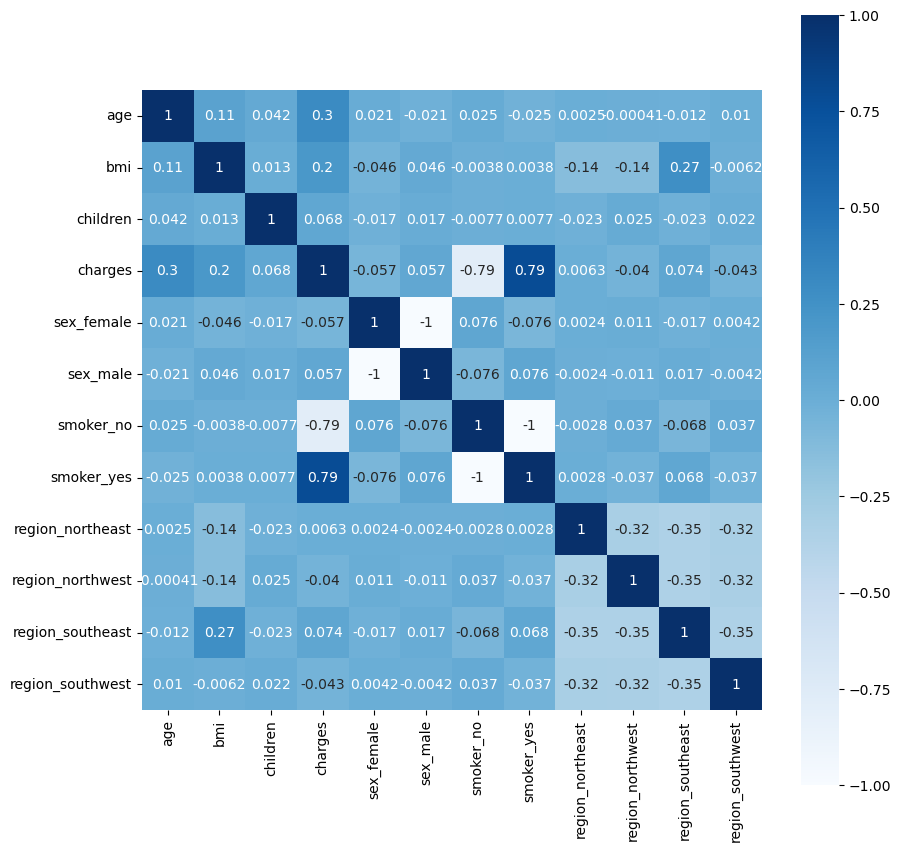

In [30]:
data_encoded = pd.get_dummies(data_)

# tinh su phu thuoc cua tung thuoc tinh
correlation_ = data_encoded.corr(method='pearson')

fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_,vmax=1,square=True,annot=True,cmap='Blues')

In [32]:
X6 = data_.drop(["charges"], axis=1)
y6 = data_["charges"]

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Fit and transform your input data
X6 = onehot_encoder.fit_transform(X6)

# Instantiate the linear regression model
model6 = LinearRegression()

# Perform cross-validation
scores_6 = cross_val_score(model6, X6, y6, cv=5, scoring='neg_mean_squared_error')

# Take the absolute value of scores because cross_val_score returns negative mean squared error
avg_mse_6 = -scores_6

# Print the average mean squared error
print("Average MSE:", avg_mse_6.mean())


Average MSE: 5.367648587078911e+33
